# Import libraries and connect dataset

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

from sklearn import preprocessing

import time
data = pd.read_csv('dataset/WineQT.csv')

# Dataset preprocessing

In [45]:
print(f"Training data info:\n{data.info()}")
print(f"Training data shape: {data.shape}")
print(f"Training data columns: {data.columns}")
print(f"Training data sample: {data.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
Training data info:
None
Training data shape: (1143, 13)
Training data colu

# Vizualisation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


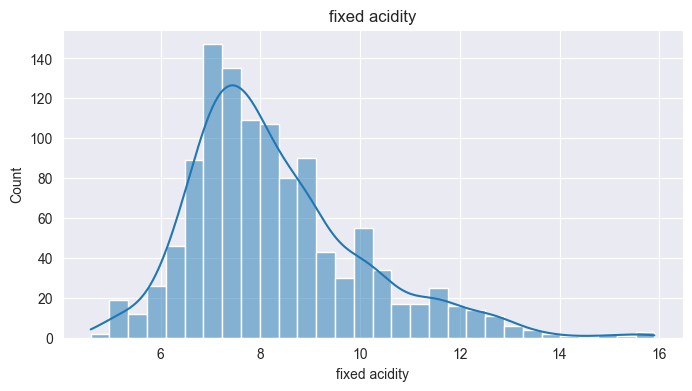

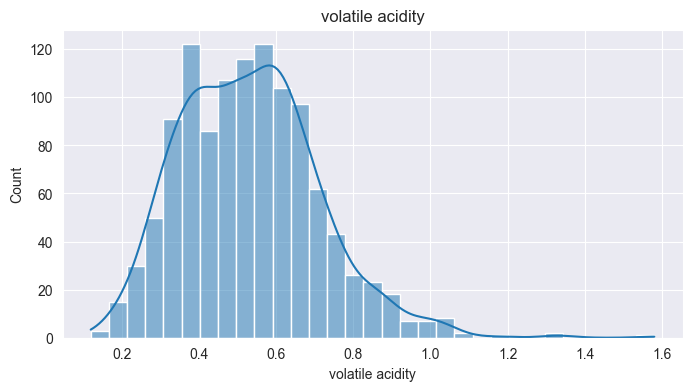

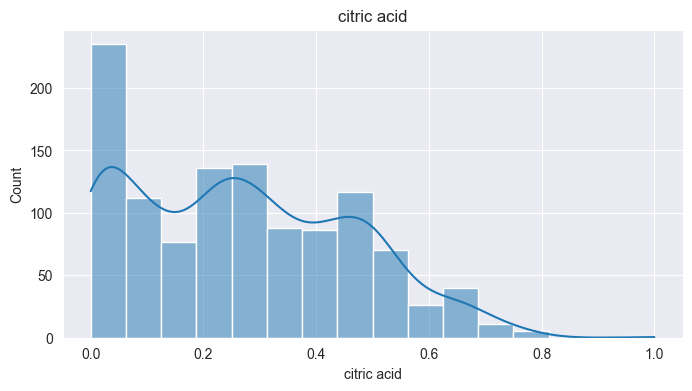

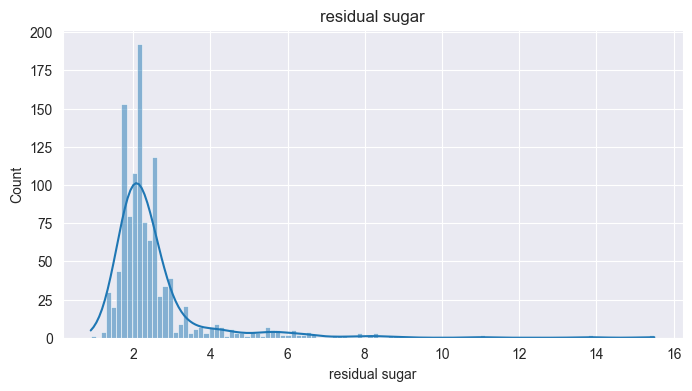

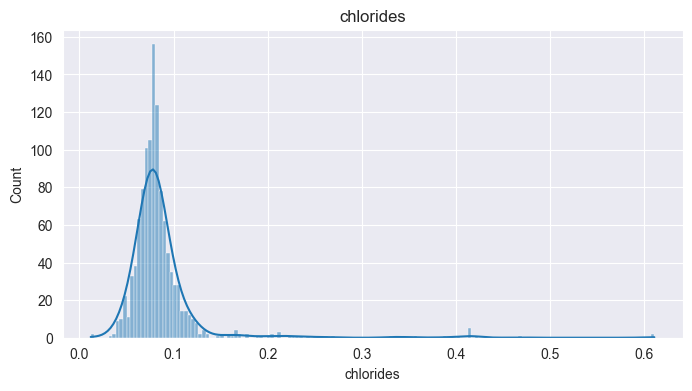

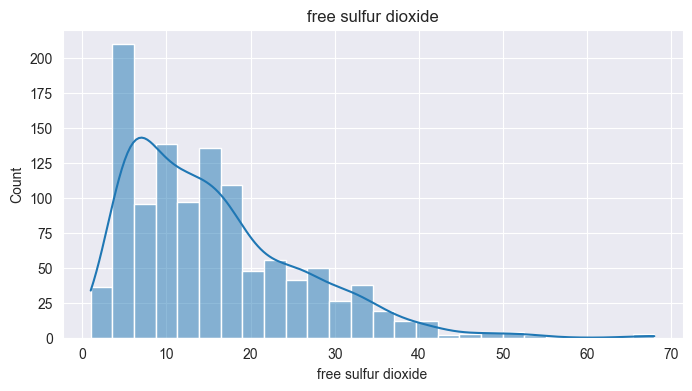

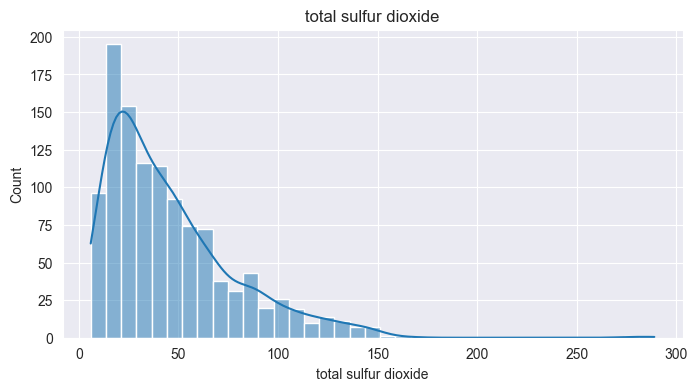

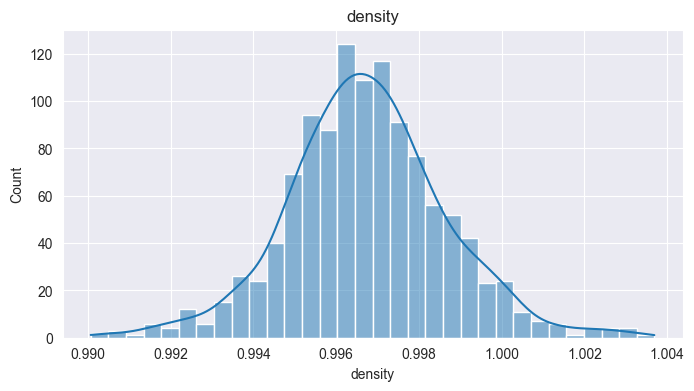

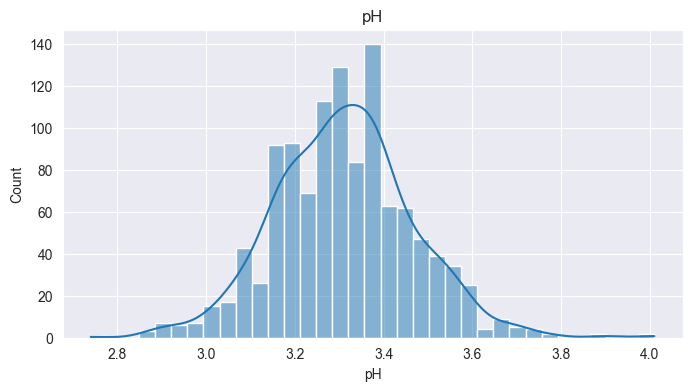

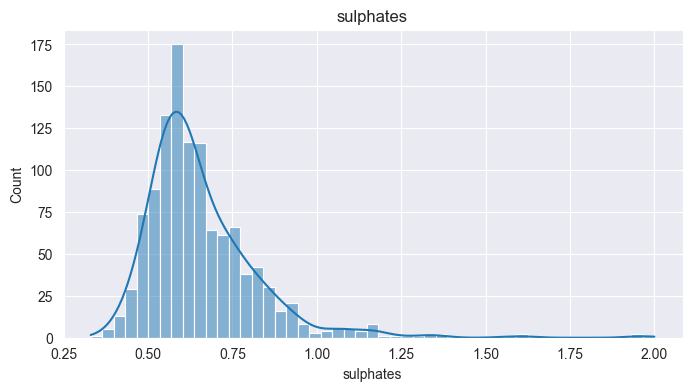

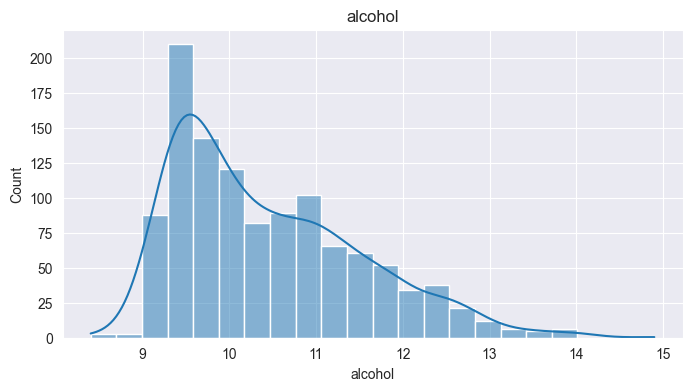

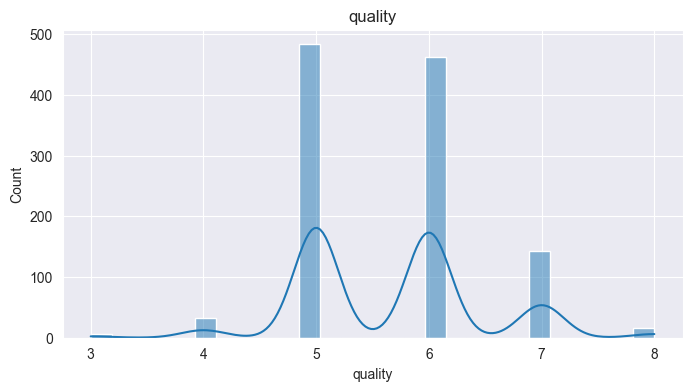

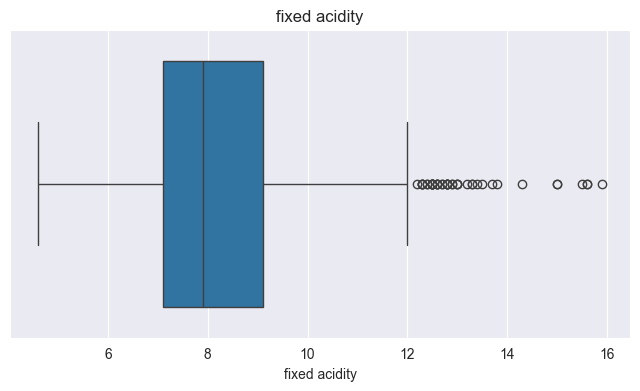

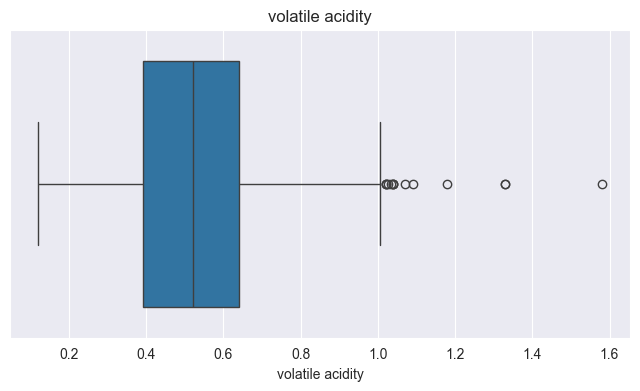

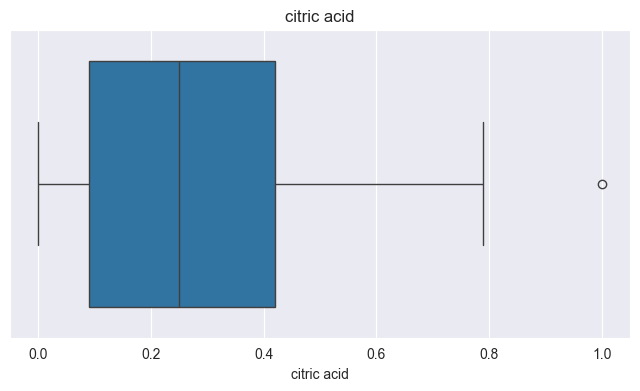

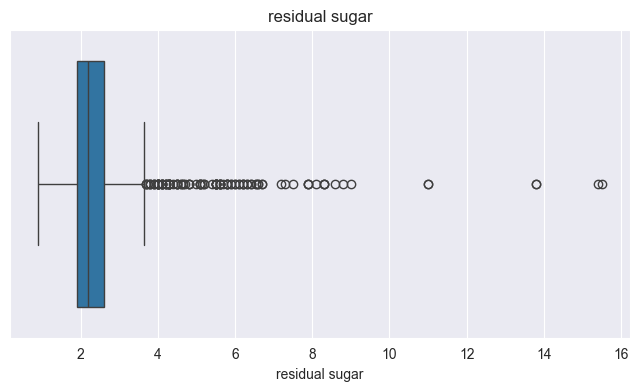

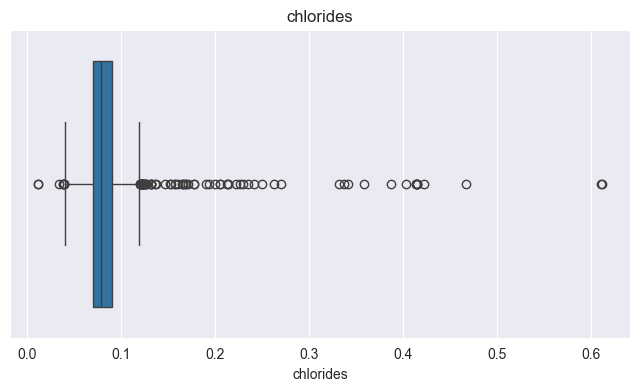

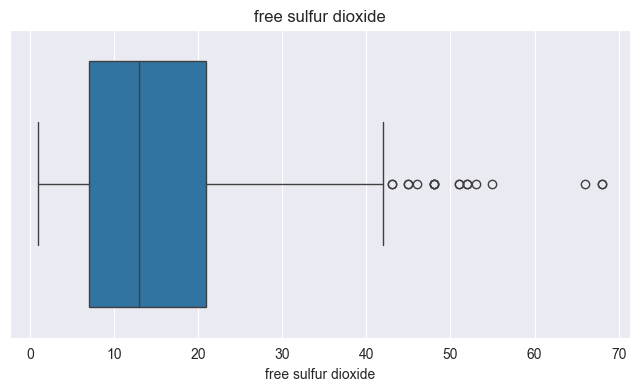

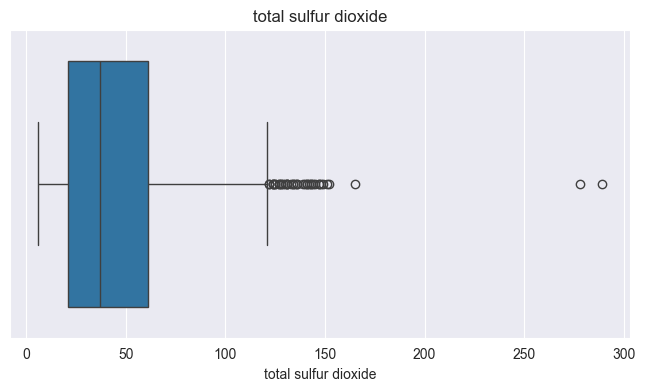

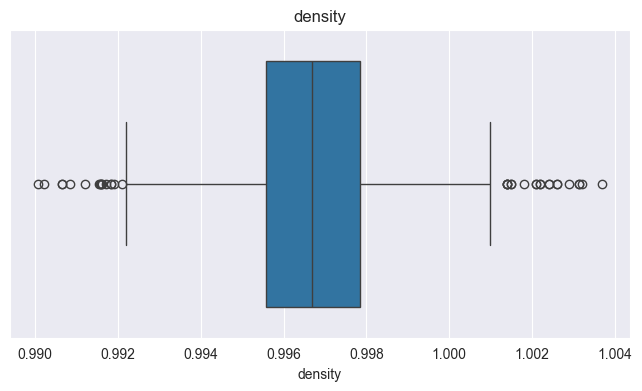

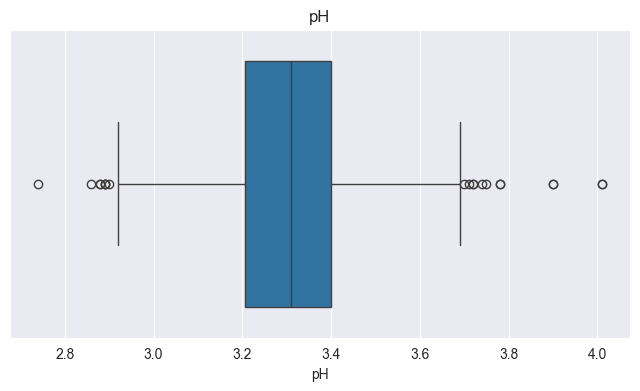

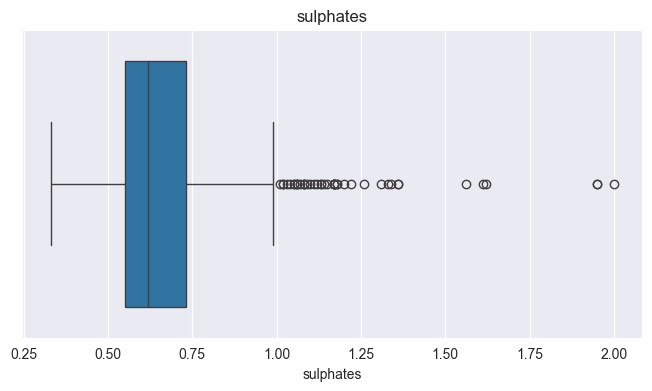

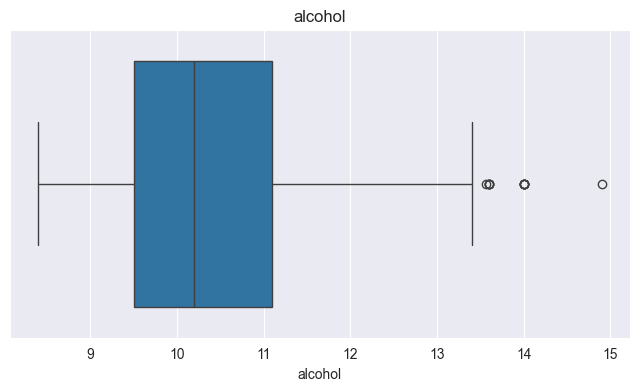

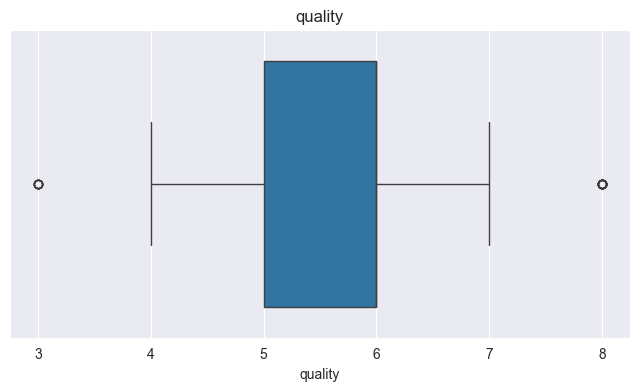

Index([], dtype='object')


In [46]:
if data.isnull().sum().sum() > 0:
    print(f"Missing values detected:\n{data.isnull().sum()}")
    data.fillna(data.mean(), inplace=True)
numeric = data.select_dtypes(include=['int64', 'float64']).columns
categorical = data.select_dtypes(exclude=['int64', 'float64']).columns
target_col = 'quality'
numeric = numeric.drop('Id')

variance = data[numeric].var().sort_values(ascending=False)
display(data[numeric].describe())

for feature in numeric:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(feature)
    plt.show()
    
for feature in numeric:
    plt.figure(figsize=(8,4))
    sns.boxplot(x = data[feature].dropna())
    plt.title(feature)
    plt.show()

print(categorical)

# Data preproccesing

In [47]:
X = data.drop(columns=[target_col, "Id"])
y = data[target_col]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
scaler = StandardScaler()
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])




In [48]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

start_time = time.time()
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Tuning Time: {time.time() - start_time:.2f} seconds")


/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuning Time: 0.68 seconds


# Train the  Model and evaluate

Validation Set Performance:
Accuracy: 0.59
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.65      0.76      0.70        72
           6       0.56      0.48      0.52        69
           7       0.48      0.62      0.54        21
           8       0.00      0.00      0.00         3

    accuracy                           0.59       171
   macro avg       0.28      0.31      0.29       171
weighted avg       0.56      0.59      0.57       171

Test Set Performance:
Accuracy: 0.57
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.64      0.78      0.70        73
           6       0.55      0.51      0.53        69
           7       0.32      0.27      0.29        22
           8       0.00      0.00      0.00         

/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/volodic/PycharmProjects/ML-project/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

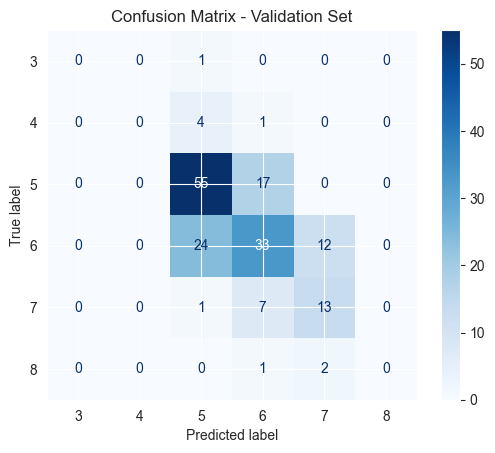

In [49]:
best_params = grid_search.best_params_
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier.fit(X_train, y_train)

# Evaluate on Validation Set
y_val_pred = dt_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Set Performance:")
print(f"Accuracy: {val_accuracy:.2f}")
print(classification_report(y_val, y_val_pred))

# Evaluate on Test Set
y_test_pred = dt_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Set Performance:")
print(f"Accuracy: {test_accuracy:.2f}")
print(classification_report(y_test, y_test_pred))

cm_val = confusion_matrix(y_val, y_val_pred)

# Using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=dt_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.show()


# Cross-Validation vs Holdout Comparison

In [50]:
cv_results = grid_search.cv_results_
cv_accuracy = max(cv_results['mean_test_score'])
print(f"Cross-Validation Accuracy: {cv_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Cross-Validation Accuracy: 0.57
Validation Accuracy: 0.59
Test Accuracy: 0.57


# Feature Importance Visualization

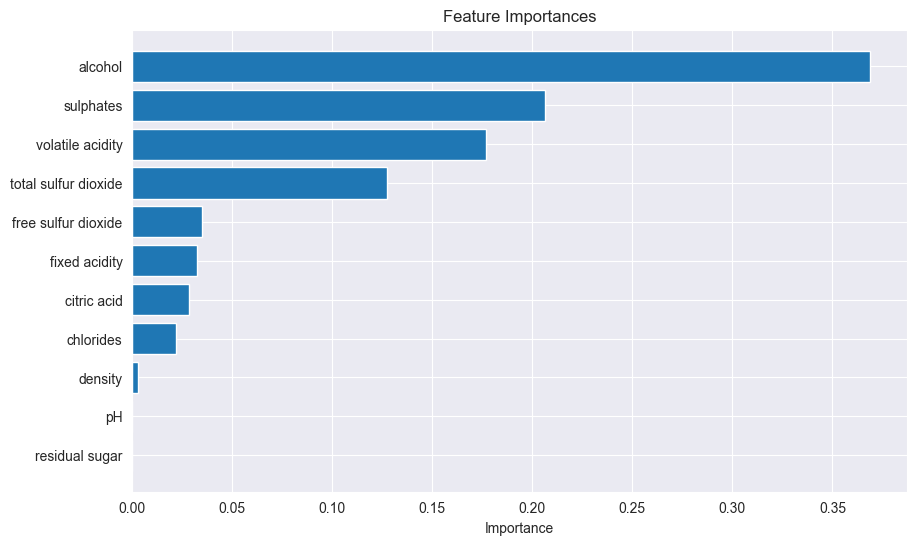

In [51]:
importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(len(importances)), importances[indices])
plt.yticks(range(len(importances)), [X.columns[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()